In [1]:
import pandas as pd

diabetes_df=pd.read_csv('diabetes.csv')

diabetes_df.shape

(768, 9)

In [2]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [3]:
diabetes_df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [4]:
diabetes_df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [5]:
y=diabetes_df['Outcome']
diabetes_df.drop(columns='Outcome',inplace=True)

In [6]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(diabetes_df,y,random_state=0,test_size=0.2)

In [8]:
from sklearn.linear_model import LogisticRegression

logreg=LogisticRegression()

logreg.fit(X_train, y_train)  #training the logistic regression model

pred=logreg.predict(X_test)  #testing on the dataset


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [9]:
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score,f1_score,roc_curve,roc_auc_score,r2_score

confusion_matrix(y_test,pred)

array([[98,  9],
       [18, 29]], dtype=int64)

In [10]:
accuracy_score(y_test,pred)


0.8246753246753247

In [11]:
recall_score(y_test,pred)

0.6170212765957447

In [12]:
precision_score(y_test,pred)

0.7631578947368421

In [13]:
f1_score(y_test,pred)

0.6823529411764706

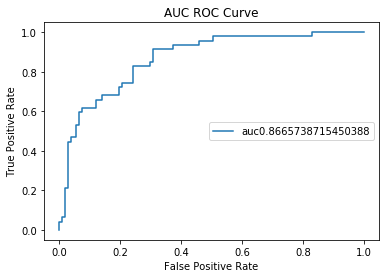

In [14]:
import matplotlib.pyplot as plt

logregpred_probab=logreg.predict_proba(X_test)[::,1]

fpr,tpr,thresholds=roc_curve(y_test,logregpred_probab)

auc=roc_auc_score(y_test, logregpred_probab)

plt.plot(fpr,tpr,label="auc"+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AUC ROC Curve')

plt.legend(loc=5)

plt.show()

In [15]:
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
dtc.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
dt_predictions=dtc.predict(X_test)

In [17]:
dt_predictions

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [18]:
confusion_matrix(y_test,dt_predictions)

array([[87, 20],
       [13, 34]], dtype=int64)

In [19]:
precision_score(y_test,dt_predictions)

0.6296296296296297

In [20]:
recall_score(y_test,dt_predictions)

0.723404255319149

In [21]:
f1_score(y_test,dt_predictions)

0.6732673267326733

In [24]:
from sklearn.cluster import KMeans

inertias=[]

for i in range(1,11):
    km=KMeans(n_clusters=i)
    km.fit(diabetes_df)
    inertias.append(km.inertia_)
    


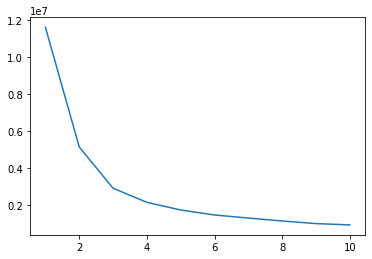

In [25]:
import matplotlib.pyplot as plt

plt.plot(range(1,11),inertias)

In [26]:
km1=KMeans(n_clusters=5)

km1.fit(diabetes_df)


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [27]:
km1.cluster_centers_

array([[4.40364583e+00, 1.19096354e+02, 6.73723958e+01, 1.19322917e+01,
        5.62500000e-01, 3.09541667e+01, 4.22200521e-01, 3.55833333e+01],
       [4.24444444e+00, 1.50755556e+02, 7.37777778e+01, 3.02444444e+01,
        3.01177778e+02, 3.55733333e+01, 5.66666667e-01, 3.40666667e+01],
       [3.75886525e+00, 1.33907801e+02, 7.19787234e+01, 3.09787234e+01,
        1.66808511e+02, 3.42375887e+01, 5.57297872e-01, 3.31276596e+01],
       [3.11111111e+00, 1.65833333e+02, 7.34444444e+01, 3.56666667e+01,
        5.48833333e+02, 3.69611111e+01, 6.60666667e-01, 3.45555556e+01],
       [2.69444444e+00, 1.02577778e+02, 6.89500000e+01, 2.67722222e+01,
        7.84333333e+01, 3.10572222e+01, 4.68361111e-01, 2.79944444e+01]])

In [28]:
km1.labels_

array([0, 0, 0, 4, 2, 0, 4, 0, 3, 0, 0, 0, 0, 3, 2, 0, 2, 0, 4, 4, 2, 0,
       0, 0, 2, 4, 0, 2, 4, 0, 0, 1, 4, 0, 0, 2, 0, 0, 0, 2, 4, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 4, 0, 0, 1, 1, 0, 1, 4, 0, 2, 0, 0, 0, 2, 0, 0,
       0, 0, 4, 4, 4, 2, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 4,
       4, 0, 0, 2, 4, 0, 4, 2, 0, 4, 4, 2, 0, 0, 0, 4, 0, 2, 0, 2, 0, 4,
       2, 3, 4, 0, 2, 0, 0, 0, 0, 4, 4, 0, 4, 0, 0, 4, 2, 4, 2, 0, 2, 0,
       2, 0, 4, 2, 4, 4, 0, 1, 0, 0, 4, 0, 1, 0, 0, 4, 0, 0, 2, 0, 2, 3,
       0, 0, 4, 2, 4, 2, 0, 4, 1, 0, 0, 2, 0, 0, 0, 4, 0, 2, 0, 4, 4, 2,
       0, 2, 0, 0, 0, 4, 4, 0, 0, 0, 3, 4, 4, 2, 0, 4, 0, 0, 0, 2, 0, 4,
       4, 1, 0, 0, 0, 4, 2, 0, 1, 0, 4, 0, 0, 0, 0, 2, 2, 1, 2, 4, 0, 0,
       3, 0, 0, 2, 4, 4, 0, 0, 3, 4, 0, 1, 4, 0, 4, 0, 2, 0, 0, 0, 0, 4,
       0, 2, 2, 0, 0, 3, 1, 0, 0, 0, 4, 0, 1, 0, 0, 0, 1, 2, 2, 0, 0, 0,
       0, 4, 0, 0, 0, 0, 0, 4, 0, 4, 0, 4, 0, 4, 0, 1, 0, 2, 2, 0, 0, 2,
       3, 2, 4, 4, 4, 4, 2, 2, 0, 2, 1, 2, 2, 0, 0,